Step 1 — Upload Video in Colab

In [1]:
from google.colab import files

uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print("Uploaded video:", video_path)


Saving WIN_20251123_01_36_54_Pro.mp4 to WIN_20251123_01_36_54_Pro.mp4
Uploaded video: WIN_20251123_01_36_54_Pro.mp4


Step 2 — Background Subtraction and Display Frames Inline

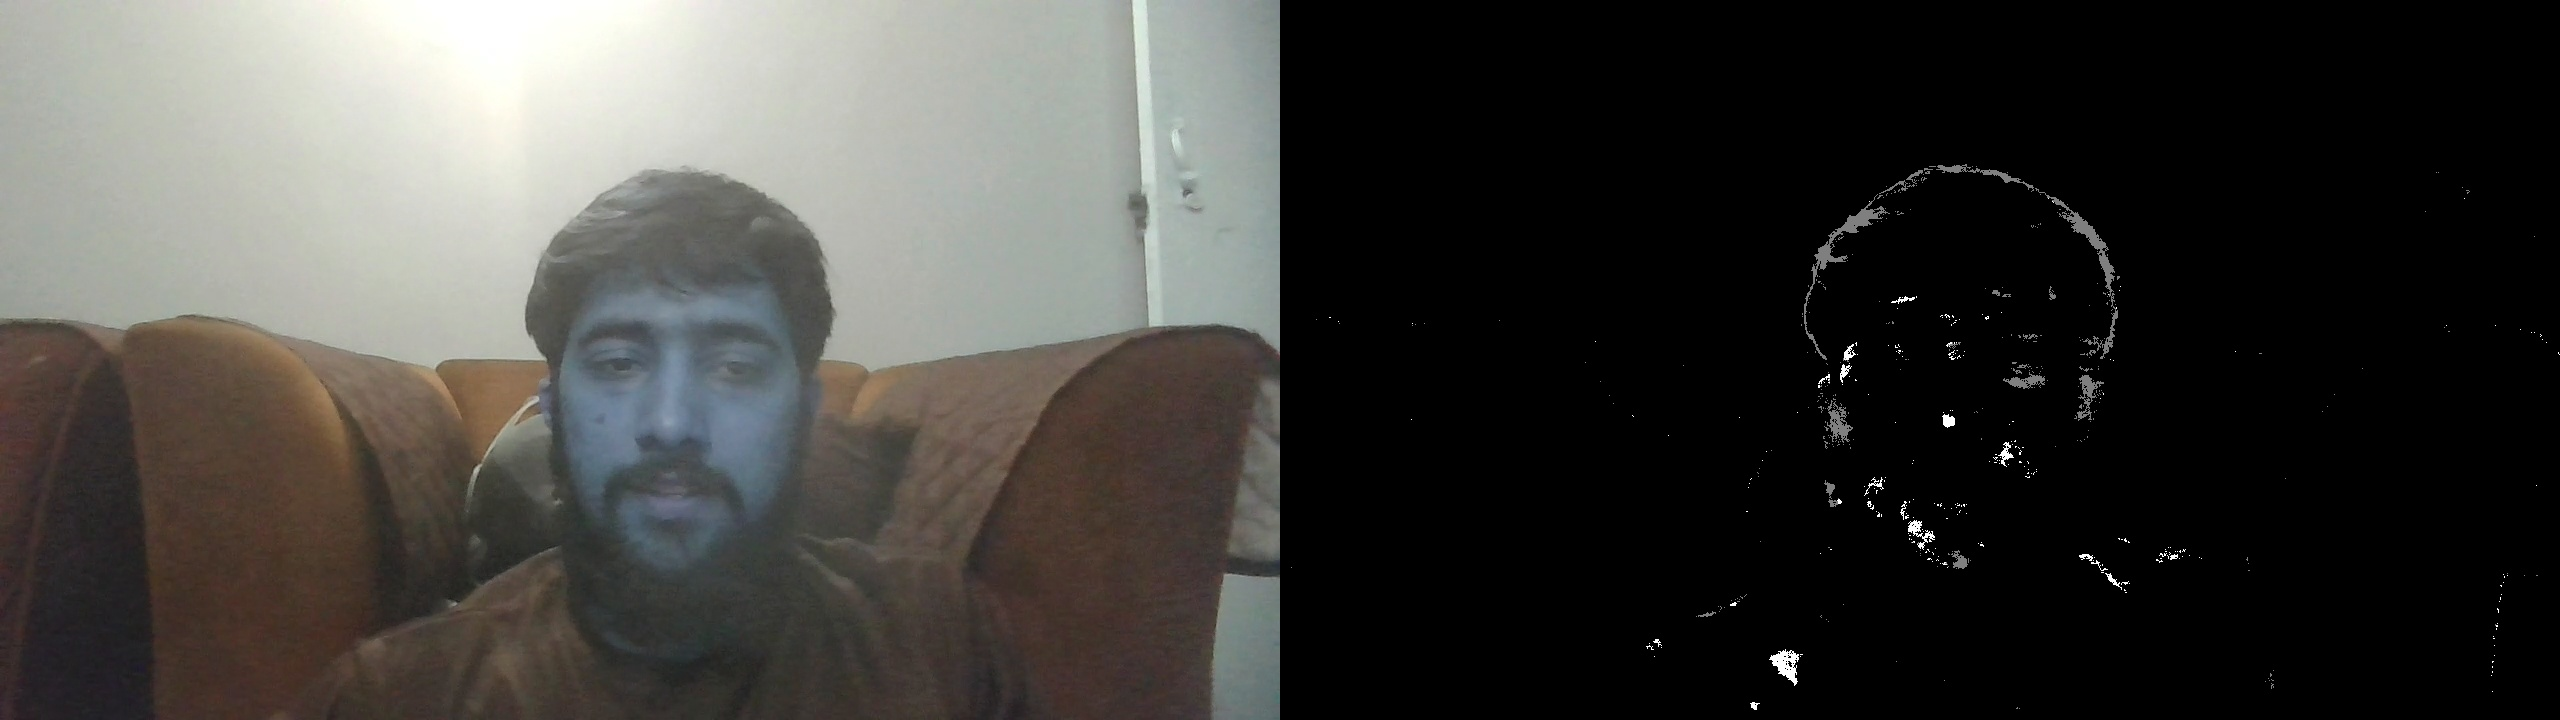

In [3]:
import cv2
from IPython.display import display, clear_output, Image
import numpy as np

cap = cv2.VideoCapture(video_path)
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    fgmask = fgbg.apply(frame)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    fgmask_rgb = cv2.cvtColor(fgmask, cv2.COLOR_GRAY2RGB)

    combined = np.hstack((frame_rgb, fgmask_rgb))

    _, buf = cv2.imencode('.jpg', combined)
    clear_output(wait=True)
    display(Image(data=buf.tobytes()))

cap.release()


Step 3 — Optional: Save Foreground Video

In [4]:
cap = cv2.VideoCapture(video_path)
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('foreground_output.mp4', fourcc, 20.0,
                      (int(cap.get(3)), int(cap.get(4))), False)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    fgmask = fgbg.apply(frame)
    out.write(fgmask)

cap.release()
out.release()
print("Foreground video saved as foreground_output.mp4")


Foreground video saved as foreground_output.mp4


In [5]:
from google.colab import files
import cv2
import numpy as np

uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print("Uploaded video:", video_path)

cap = cv2.VideoCapture(video_path)
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out_bg = cv2.VideoWriter('background_output.mp4', fourcc, fps, (width, height))

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    fgmask = fgbg.apply(frame)

    bg = fgbg.getBackgroundImage()

    if bg is not None:
        out_bg.write(bg)

    frame_count += 1
    if frame_count % 10 == 0:
        print(f"Processed {frame_count} frames", end='\r')

cap.release()
out_bg.release()
print("\nBackground video saved as 'background_output.mp4'")


Saving WIN_20251123_01_42_13_Pro.mp4 to WIN_20251123_01_42_13_Pro.mp4
Uploaded video: WIN_20251123_01_42_13_Pro.mp4
Processed 230 frames
Background video saved as 'background_output.mp4'


Optional — Display Background in Colab

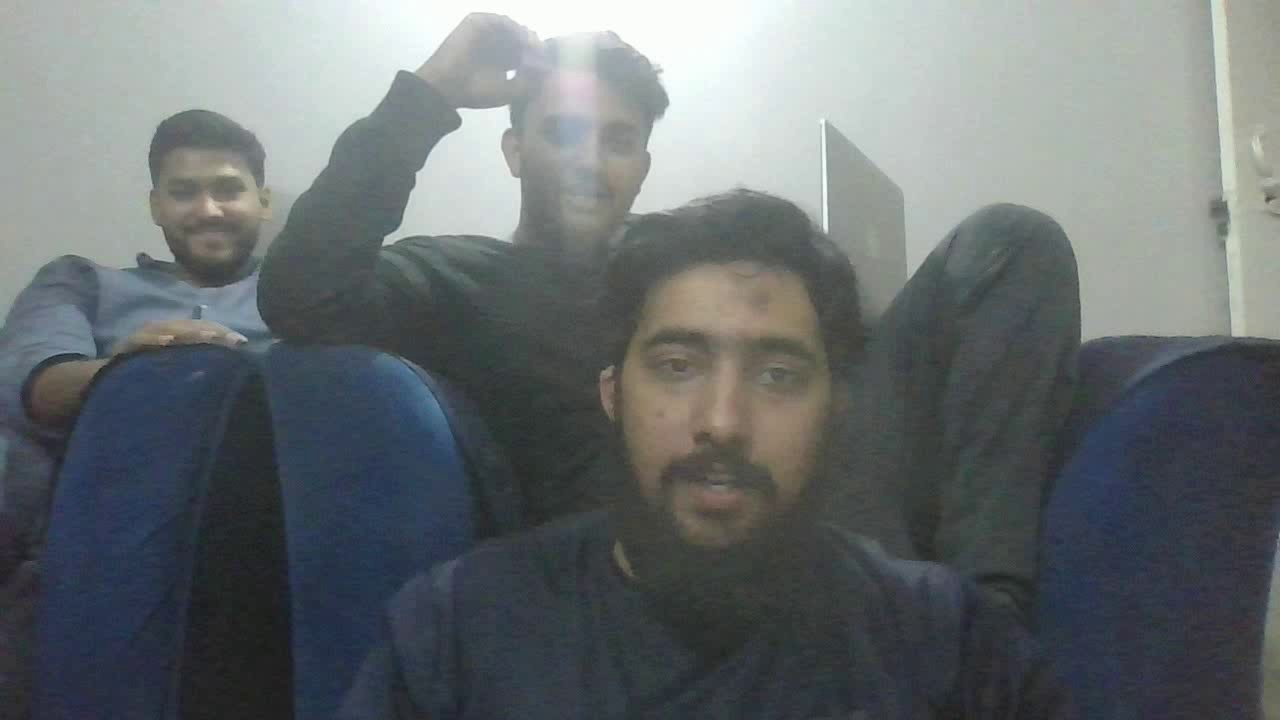

In [6]:
import IPython.display as display
from IPython.display import Image

cap = cv2.VideoCapture('background_output.mp4')
ret, frame = cap.read()
cap.release()
if ret:
    _, buf = cv2.imencode('.jpg', frame)
    display.display(Image(data=buf.tobytes()))
